In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [5]:
wh_p = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
wh_p

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [36]:
wh_p_columns = ['Country', 'Region', 'Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']

In [37]:
wh_p = wh_p[wh_p_columns].copy()

In [64]:
wh_df = wh_p.rename(columns = {'Economy (GDP per Capita)':'GDP_per_Capita','Health (Life Expectancy)': 'Health_life_expectancy','Happiness Score':'Happiness_score','Trust (Government Corruption)':'Government_corruption','Dystopia Residual':'Dystoia_residual'})

In [65]:
wh_p_columns

['Country',
 'Region',
 'Happiness Score',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [66]:
wh_df

,Country,Region,Happiness_score,GDP_per_Capita,Family,Health_life_expectancy,Freedom,Government_corruption,Generosity,Dystoia_residual
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [67]:
wh_df.head(5)

,Country,Region,Happiness_score,GDP_per_Capita,Family,Health_life_expectancy,Freedom,Government_corruption,Generosity,Dystoia_residual
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [68]:
wh_df.tail(5)

,Country,Region,Happiness_score,GDP_per_Capita,Family,Health_life_expectancy,Freedom,Government_corruption,Generosity,Dystoia_residual
153,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [70]:
wh_df.shape

(158, 10)

In [71]:
wh_df.columns

Index(['Country', 'Region', 'Happiness_score', 'GDP_per_Capita', 'Family',
       'Health_life_expectancy', 'Freedom', 'Government_corruption',
       'Generosity', 'Dystoia_residual'],
      dtype='object')

In [72]:
wh_df.dtypes

Country                    object
Region                     object
Happiness_score           float64
GDP_per_Capita            float64
Family                    float64
Health_life_expectancy    float64
Freedom                   float64
Government_corruption     float64
Generosity                float64
Dystoia_residual          float64
dtype: object

In [73]:
wh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 158 non-null    object 
 1   Region                  158 non-null    object 
 2   Happiness_score         158 non-null    float64
 3   GDP_per_Capita          158 non-null    float64
 4   Family                  158 non-null    float64
 5   Health_life_expectancy  158 non-null    float64
 6   Freedom                 158 non-null    float64
 7   Government_corruption   158 non-null    float64
 8   Generosity              158 non-null    float64
 9   Dystoia_residual        158 non-null    float64
dtypes: float64(8), object(2)
memory usage: 12.5+ KB


In [74]:
wh_df.isnull().sum()

Country                   0
Region                    0
Happiness_score           0
GDP_per_Capita            0
Family                    0
Health_life_expectancy    0
Freedom                   0
Government_corruption     0
Generosity                0
Dystoia_residual          0
dtype: int64

In [75]:
wh_df.isnull().sum().sum()

0

In [76]:
wh_df.describe()

,Happiness_score,GDP_per_Capita,Family,Health_life_expectancy,Freedom,Government_corruption,Generosity,Dystoia_residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<Axes: >

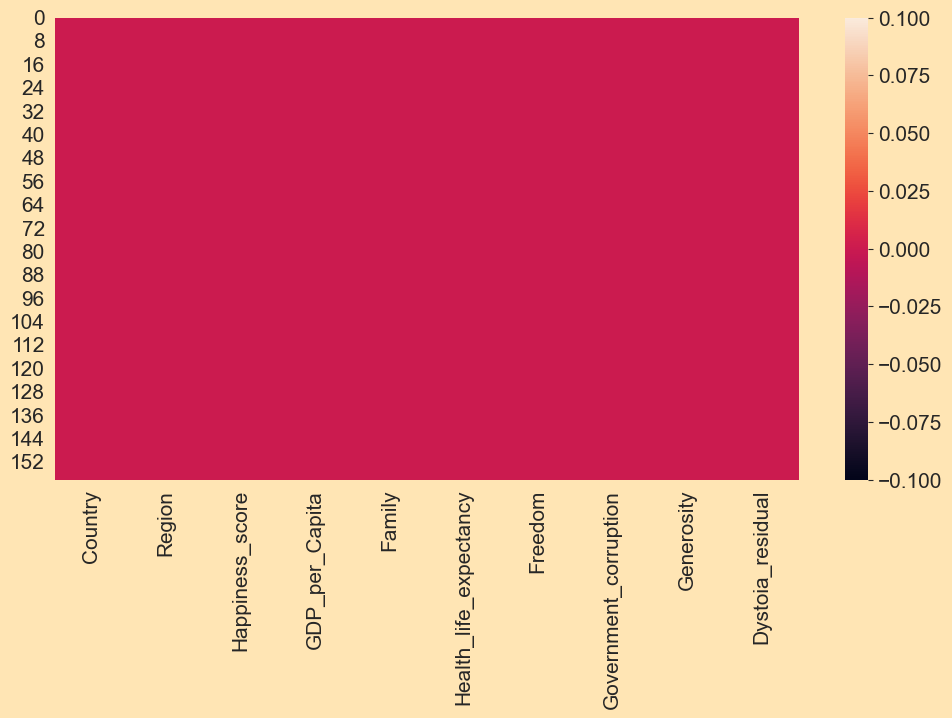

In [77]:
sns.heatmap(wh_df.isnull())

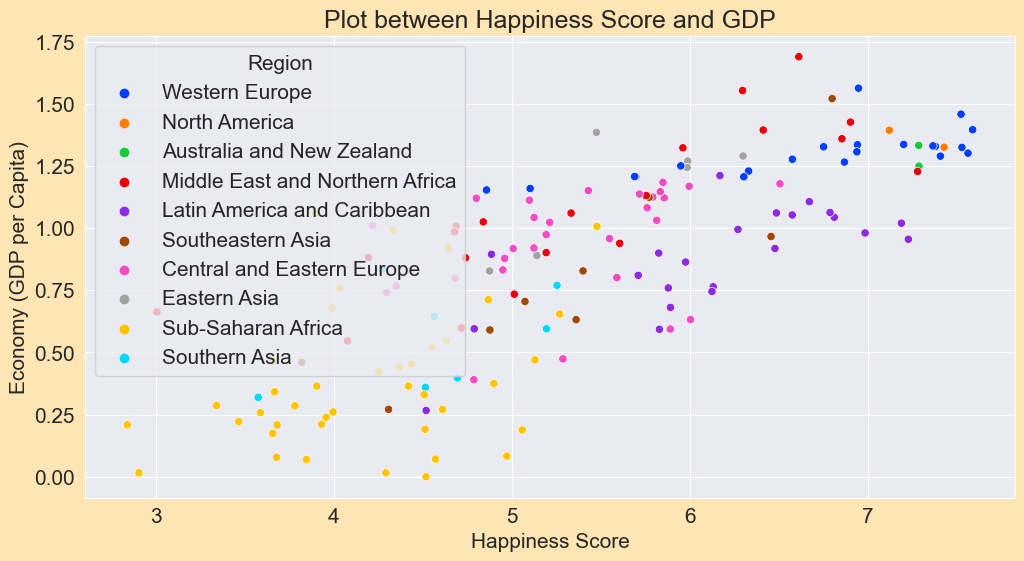

In [83]:
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x='Happiness Score', y='Economy (GDP per Capita)', data = wh_p, hue = 'Region', palette = 'bright')
plt.show()

<Axes: title={'center': 'Plot between Happiness Score and GDP'}, xlabel='Happiness_score', ylabel='GDP_per_Capita'>

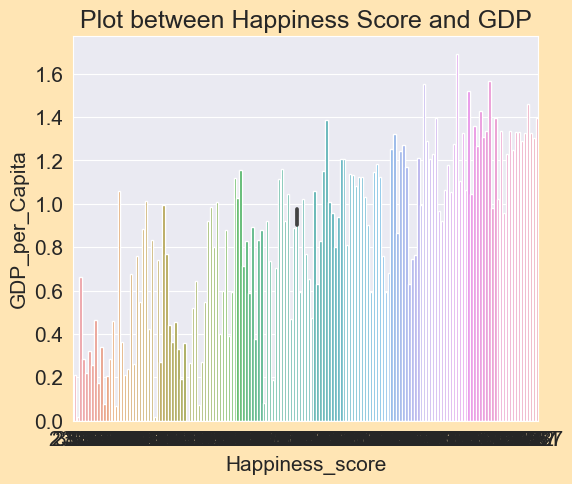

In [88]:
plt.figure(figsize = (6,5))
plt.title('Plot between Happiness Score and GDP')
sns.barplot(x = 'Happiness_score', y = 'GDP_per_Capita', data = wh_df)

<Axes: title={'center': 'Plot between Happiness Score and Health'}, xlabel='Happiness_score', ylabel='Health_life_expectancy'>

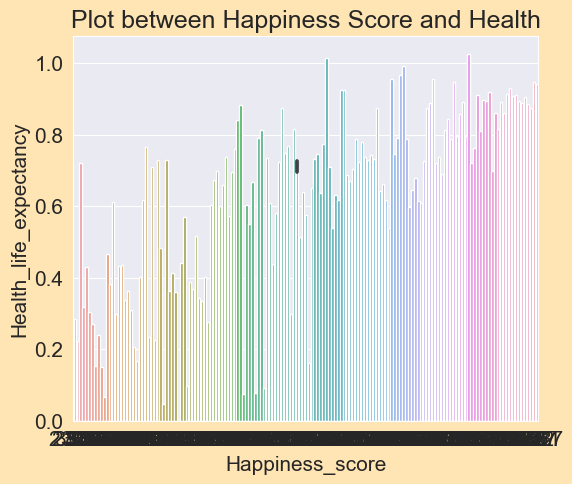

In [89]:
plt.figure(figsize = (6,5))
plt.title('Plot between Happiness Score and Health')
sns.barplot(x = 'Happiness_score', y = 'Health_life_expectancy', data = wh_df)

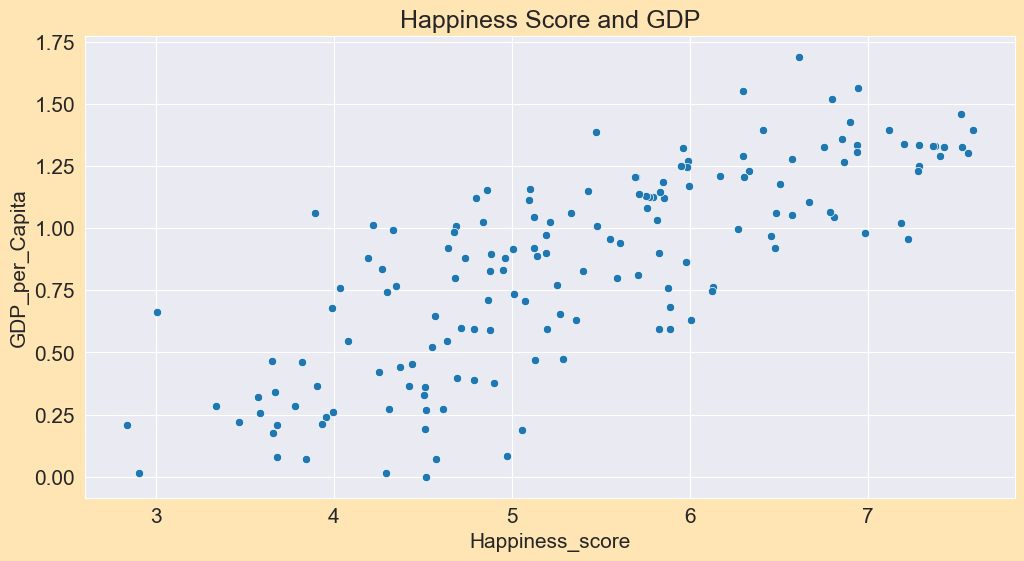

In [90]:
plt.title('Happiness Score and GDP')
sns.scatterplot(x='Happiness_score', y='GDP_per_Capita', data = wh_df,)
plt.show()

In [92]:
GDP_Region = wh_df.groupby('Region')['GDP_per_Capita'].sum()
GDP_Region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: GDP_per_Capita, dtype: float64

Text(0, 0.5, '')

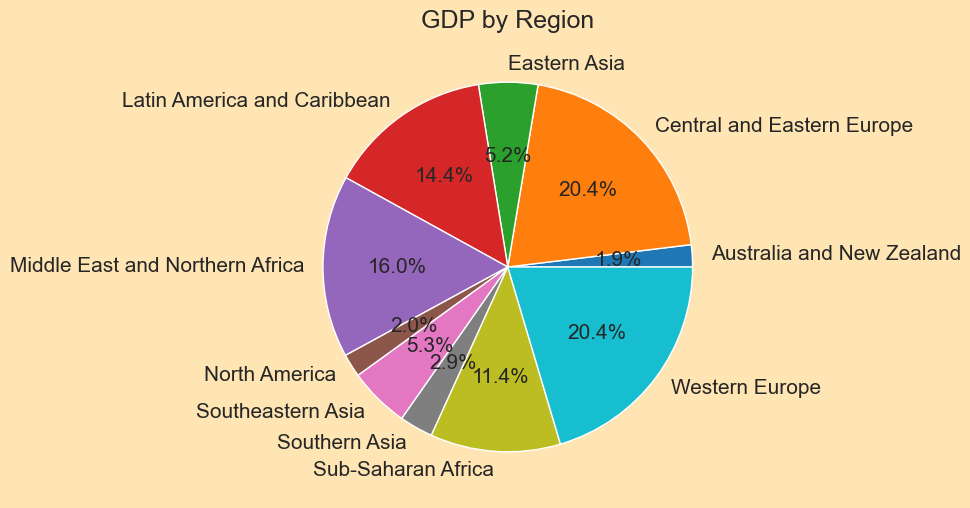

In [93]:
GDP_Region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [94]:
total_country = wh_df.groupby('Region')[['Country']].count()
print(total_country)

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


In [95]:
corruption = wh_df.groupby('Region')[['Government_corruption']].mean()
corruption

,Government_corruption
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


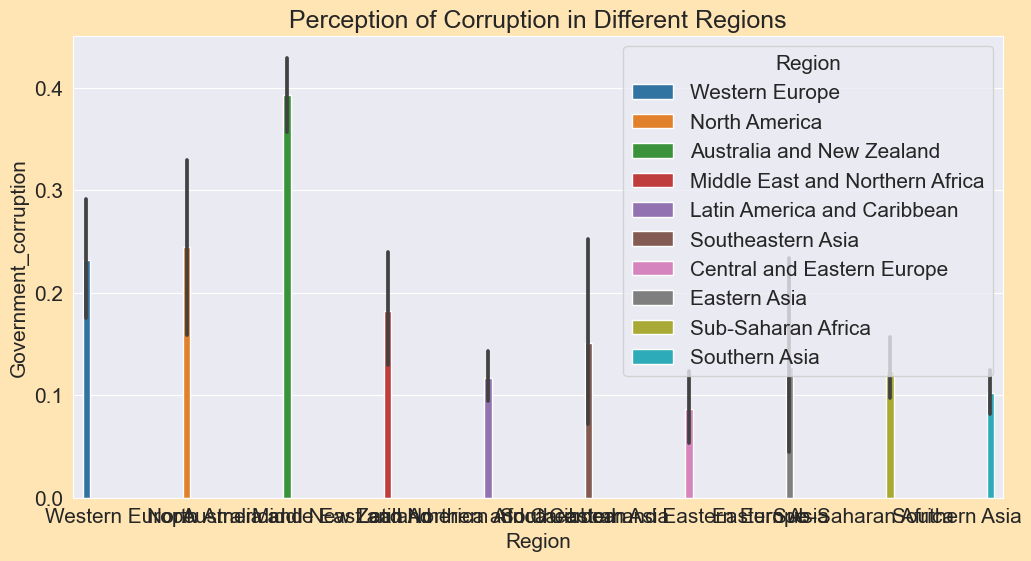

In [97]:
plt.title('Perception of Corruption in Different Regions')
sns.barplot(x='Region', y = 'Government_corruption', data = wh_df, hue = 'Region')
plt.show()

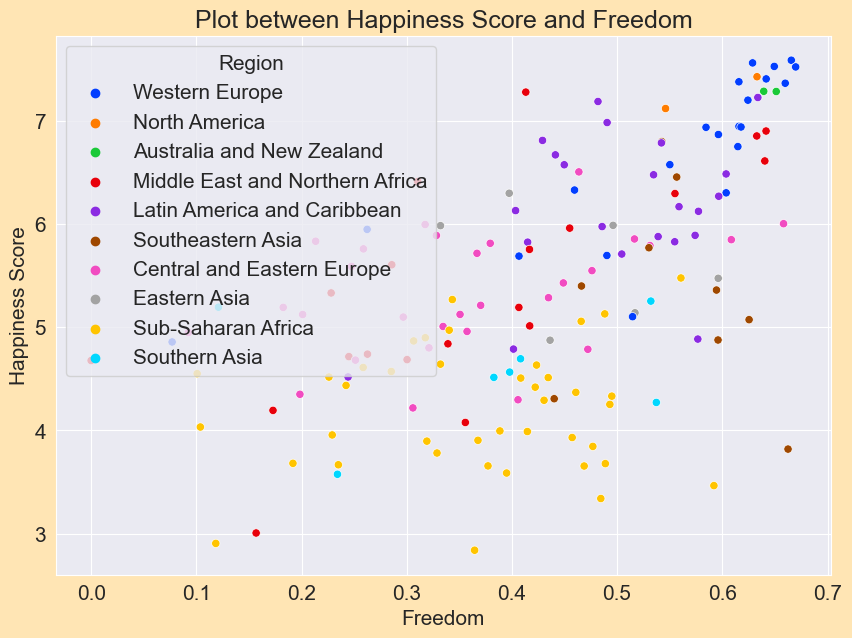

In [24]:
plt.title('Plot between Happiness Score and Freedom')
sns.scatterplot(x='Freedom', y='Happiness Score', data = wh_p, hue = 'Region', palette = 'bright')
plt.show()

In [98]:
top_10 = wh_df.head(10)
bottom_10 = wh_df.tail(10)

Text(832.0858585858584, 0.5, 'Generosity')

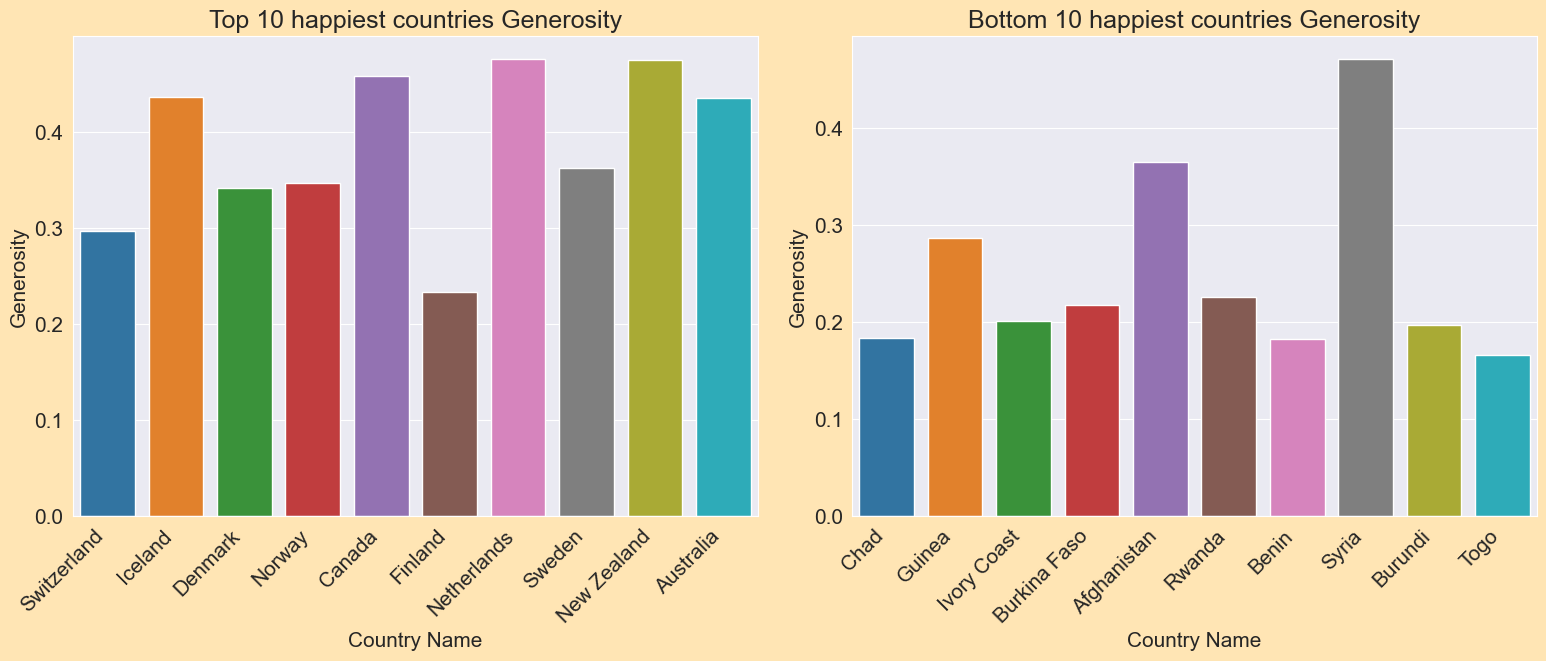

In [99]:
fig, axes = plt.subplots(1,2, figsize = (16,6))
plt.tight_layout(pad = 2)
xlabels = top_10.Country
axes[0].set_title('Top 10 happiest countries Generosity')
axes[0].set_xticklabels(xlabels,rotation = 45, ha = 'right')
sns.barplot(x = top_10.Country, y = top_10.Generosity, ax = axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Generosity')

xlabels = bottom_10.Country
axes[1].set_title('Bottom 10 happiest countries Generosity')
axes[1].set_xticklabels(xlabels,rotation = 45, ha = 'right')
sns.barplot(x = bottom_10.Country, y = bottom_10.Generosity, ax = axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Generosity')

Text(832.0858585858584, 0.5, 'Life Expectancy')

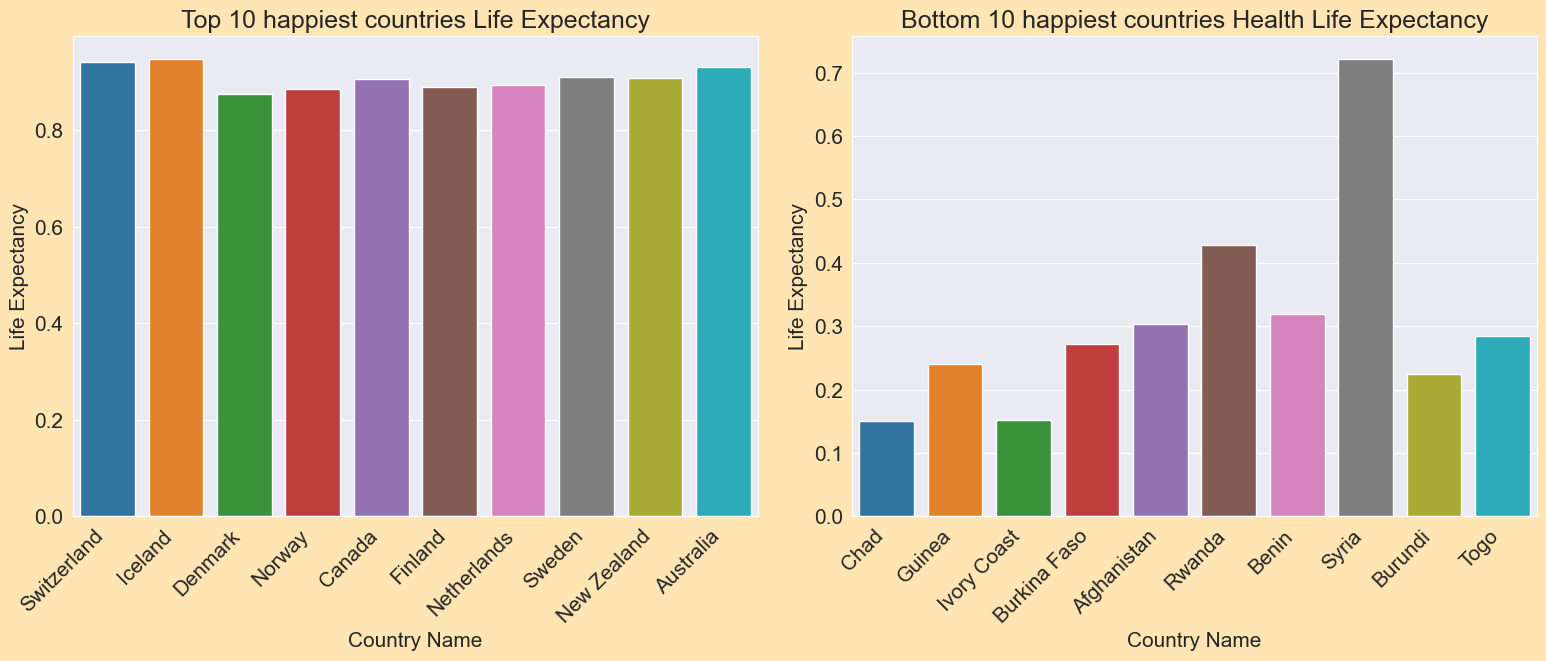

In [100]:
fig, axes = plt.subplots(1,2, figsize = (16,6))
plt.tight_layout(pad = 2)
xlabels = top_10.Country
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].set_xticklabels(xlabels,rotation = 45, ha = 'right')
sns.barplot(x = top_10.Country, y = top_10.Health_life_expectancy, ax = axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

xlabels = bottom_10.Country
axes[1].set_title('Bottom 10 happiest countries Health Life Expectancy')
axes[1].set_xticklabels(xlabels,rotation = 45, ha = 'right')
sns.barplot(x = bottom_10.Country, y = bottom_10.Health_life_expectancy, ax = axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')

Text(0, 0.5, 'Happiness Score')

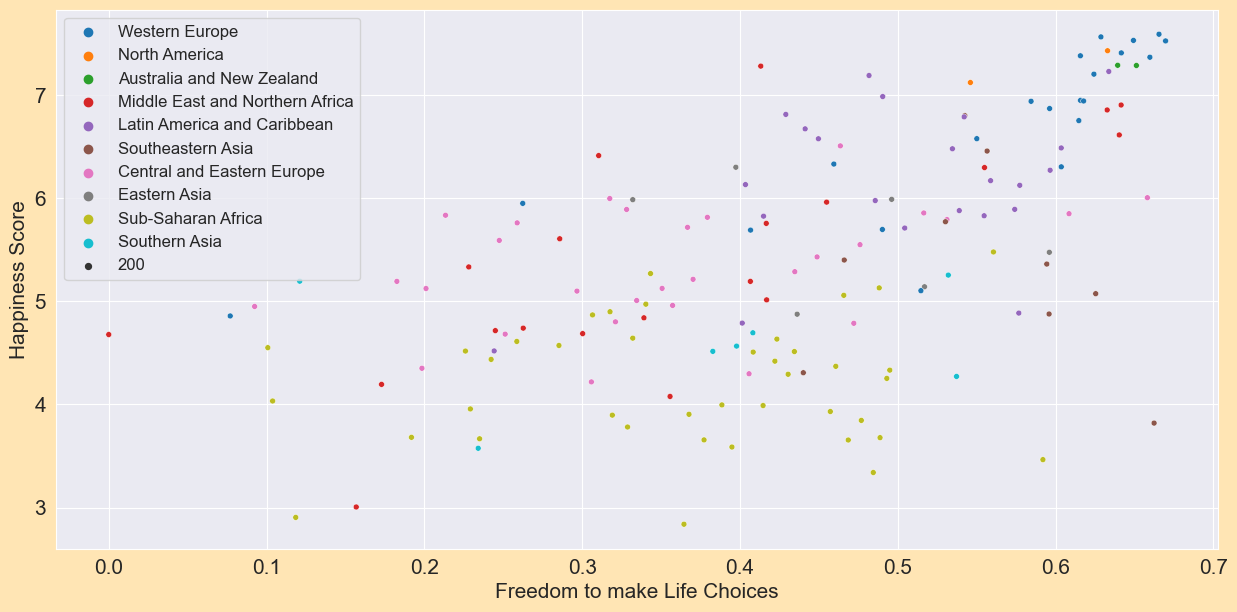

In [101]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = wh_df.Freedom, y = wh_df.Happiness_score, hue = wh_df.Region, size = 200)
plt.legend(loc = 'upper left', fontsize = '12')
plt.xlabel('Freedom to make Life Choices')
plt.ylabel('Happiness Score')

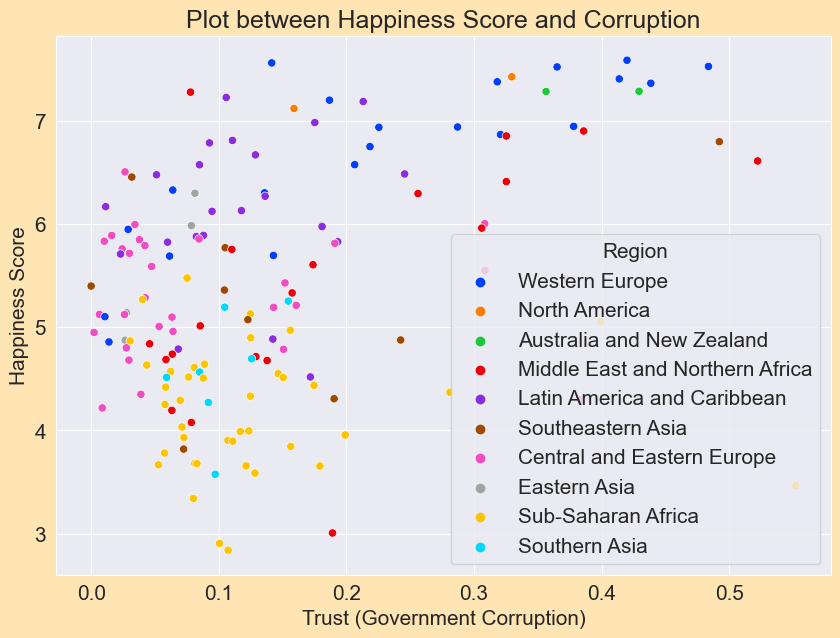

In [25]:
plt.title('Plot between Happiness Score and Corruption')
sns.scatterplot(x='Trust (Government Corruption)', y='Happiness Score', data = wh_p, hue = 'Region', palette = 'bright')
plt.show()

<BarContainer object of 10 artists>

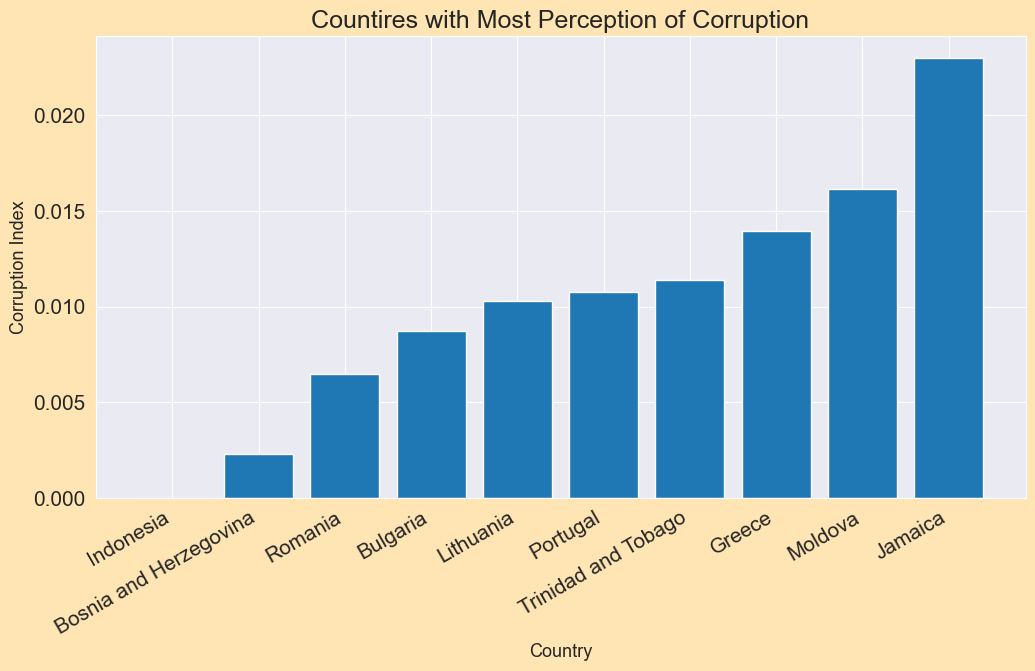

In [102]:
country = wh_df.sort_values(by = 'Government_corruption').head(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Countires with Most Perception of Corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(country.Country, country.Government_corruption)

<BarContainer object of 10 artists>

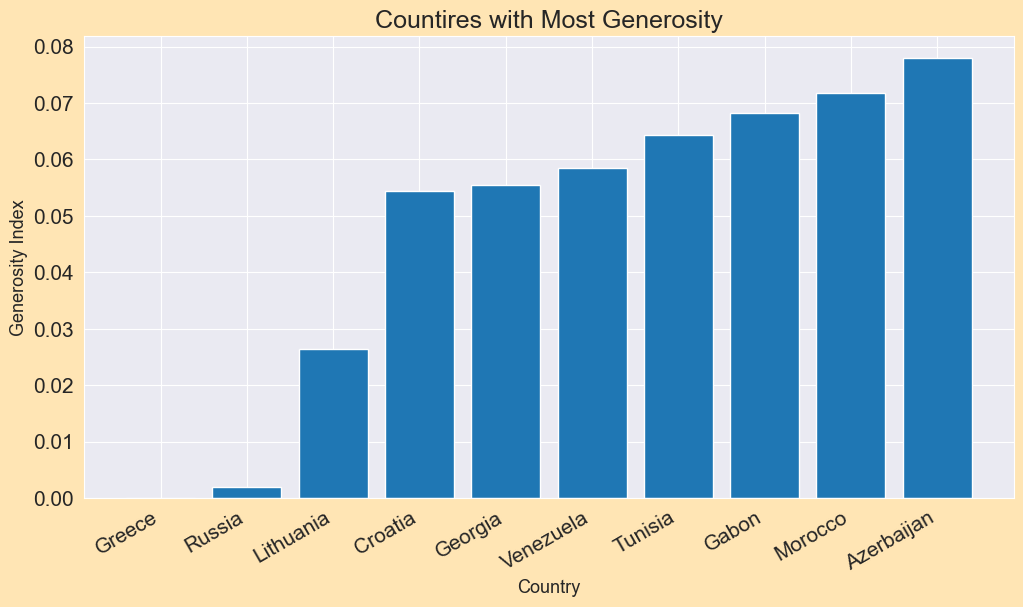

In [63]:
country = wh_p.sort_values(by = 'Generosity').head(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Countires with Most Generosity')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Generosity Index', fontsize = 13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(country.Country, country.Generosity)

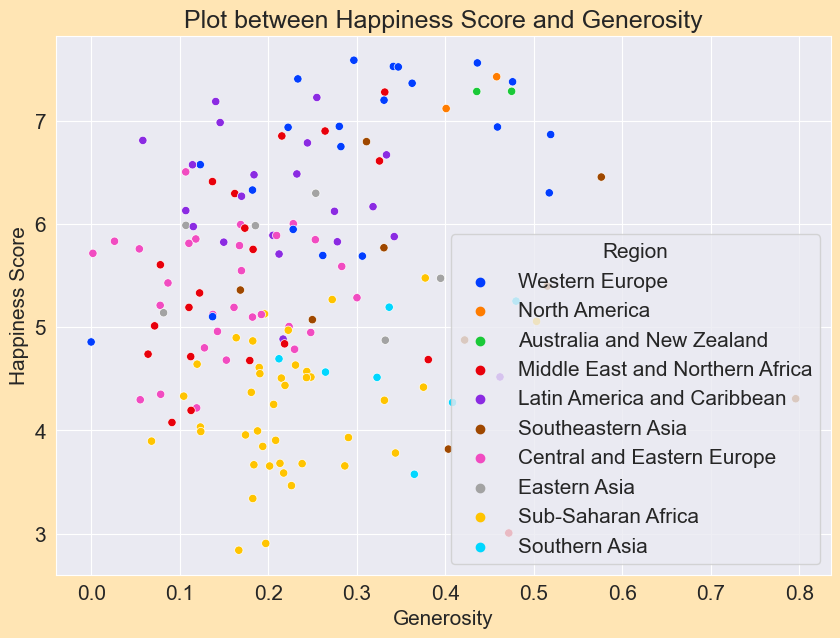

In [26]:
plt.title('Plot between Happiness Score and Generosity')
sns.scatterplot(x='Generosity', y='Happiness Score', data = wh_p, hue = 'Region', palette = 'bright')
plt.show()

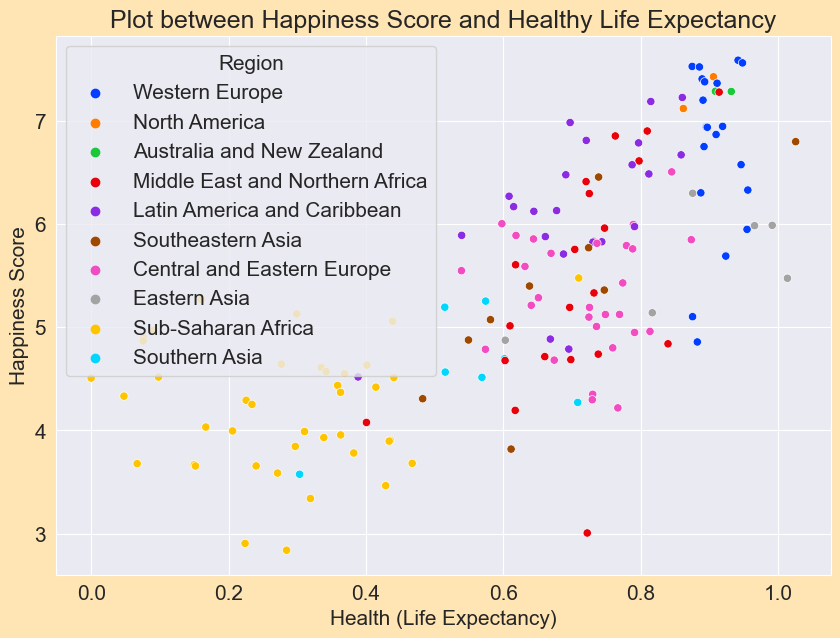

In [27]:
plt.title('Plot between Happiness Score and Healthy Life Expectancy')
sns.scatterplot(x='Health (Life Expectancy)', y='Happiness Score', data = wh_p, hue = 'Region', palette = 'bright')
plt.show()

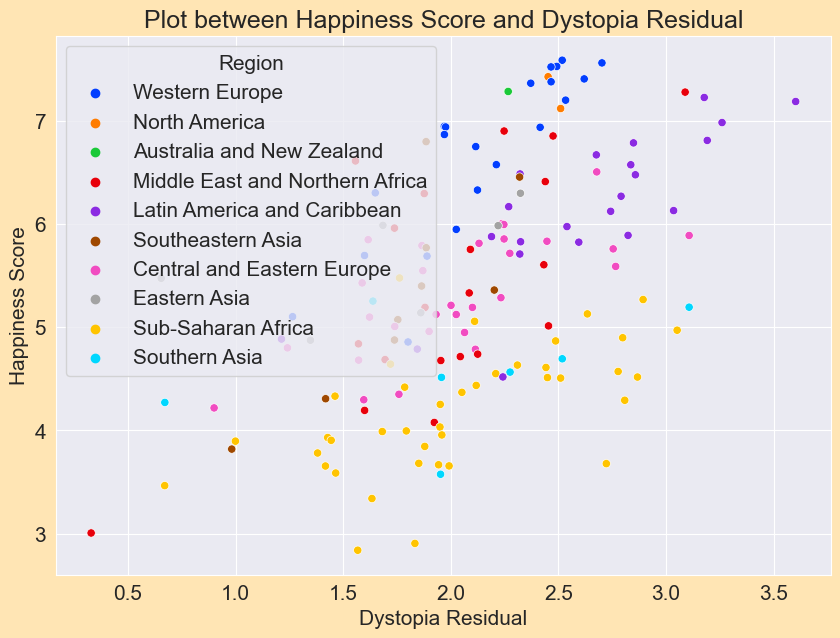

In [28]:
plt.title('Plot between Happiness Score and Dystopia Residual')
sns.scatterplot(x='Dystopia Residual', y='Happiness Score', data = wh_p, hue = 'Region', palette = 'bright')
plt.show()